# Design of a lowpass FIR filter

Alejandro Weinstein (alejandro.weinstein@gmail.com), 20150313

In [20]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import ifft, ifftshift, fftshift
from numpy import pi, abs, exp, cos
from scipy.signal import freqz, firwin, lfilter
%matplotlib inline

Filter parameters

In [2]:
M = 81 # Filter order
fs = 200 # Sampling frequency in hertz
fc = 10 # Cuttoff frequency in hertz

In [3]:
h = firwin(M, cutoff=fc, nyq=fs/2)

We can plot the result to veryfy the design.

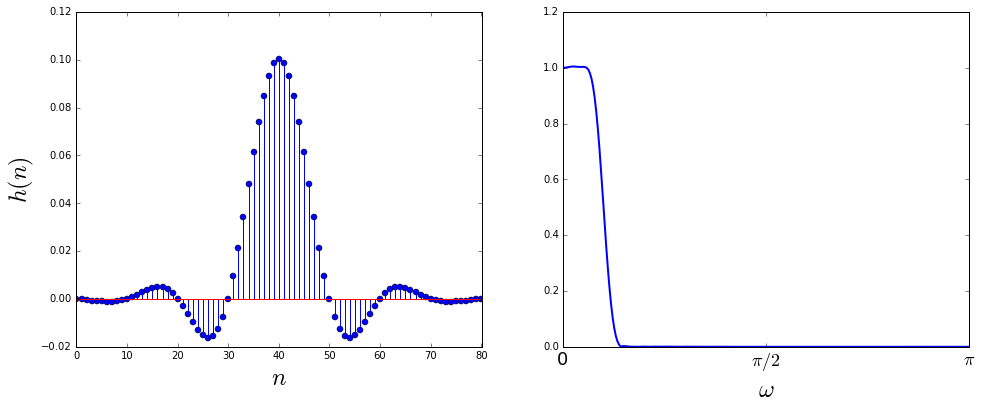

In [14]:
w = np.linspace(-pi, pi, 500)
k = np.arange(M)
_, H = freqz(h, 1, w)
_, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].stem(k, h)
axs[0].set_xlim(-0.1, M-0.9)
axs[0].set_xlabel('$n$', fontsize=24)
axs[0].set_ylabel('$h(n)$', fontsize=24)

axs[1].plot(w, abs(H), lw=2)
axs[1].set_xlim(0, pi)
axs[1].set_xlabel(r'$\omega$', fontsize=24)
axs[1].set_xticks(([0, pi/2, pi]))
axs[1].set_xticklabels(('0', r'$\pi/2$', r'$\pi$'), fontsize=18)
#axs[1].legend((r'$H(\omega)$', r'$H_d(\omega)$',r'$H_d(\omega_k)$'), loc='upper center', fontsize=20)

Try the filter with a two-tone signal with frequencies 8 and 50 Hz.

In [31]:
f1 = 8
f2 = 50
n = np.arange(200)
x1 = cos(2 * pi * f1 * n / fs) 
x2 = cos(2 * pi * f2 * n / fs)
x = x1 + x2
y = lfilter(h, 1, x)

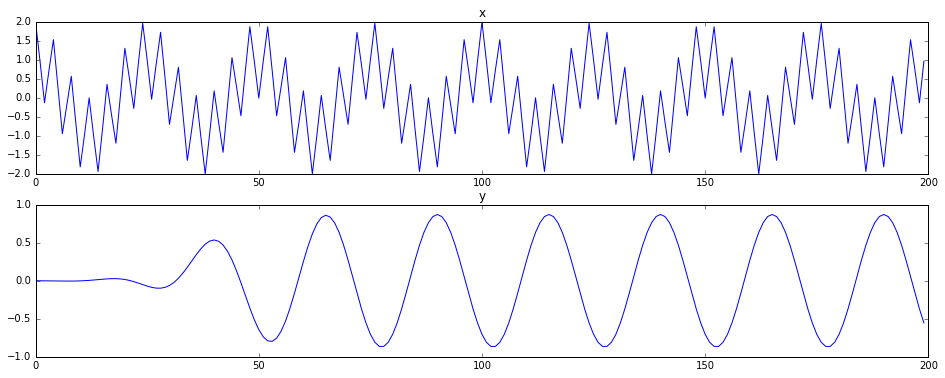

In [32]:
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,6))
ax1.plot(x)
ax1.set_title('x')
ax2.plot(y)
ax2.set_title('y')

Check the delay. First plot 8 Hz tone and the filter output

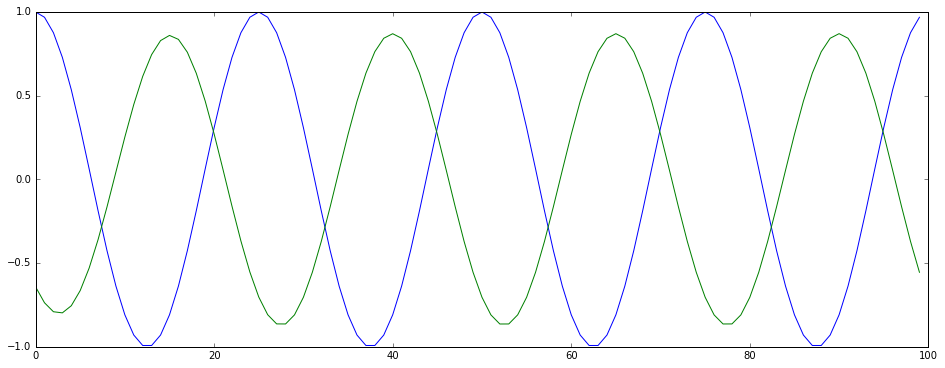

In [37]:
plt.figure(figsize=(16,6))
plt.plot(x1[50:150])
plt.plot(y[50:150])

Now plot the 8 hz tone shifted to the left by $\frac{M-1}{2}$ samples.

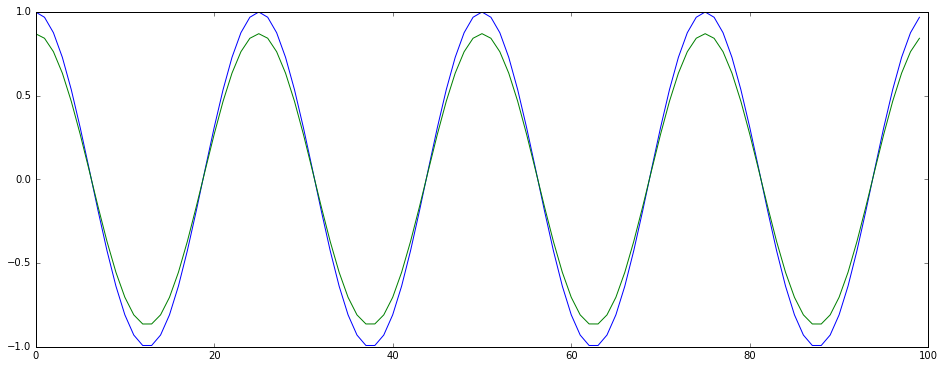

In [42]:
tau = int((M-1) /2)
plt.figure(figsize=(16,6))
plt.plot(x1[50:150])
plt.plot(y[50+tau:150+tau])